In [55]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)
import math
from google.colab import files
files.upload()

{}

In [56]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import pickle

In [3]:
df_iris = pd.read_csv("iris.csv")
print (df_iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [69]:
df_iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [71]:
df_iris['species'].unique().tolist()

['setosa', 'versicolor', 'virginica']

In [72]:
freq = df_iris.groupby(['species']).count() 
print(freq)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa                50           50            50           50
versicolor            50           50            50           50
virginica             50           50            50           50


In [73]:
freq = df_iris['species'].value_counts() 
print(freq) 

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64


In [8]:
df_iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [14]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df_iris.isnull()
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [16]:
iris=df_iris.drop(['species'], axis=1)
print(iris)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [17]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


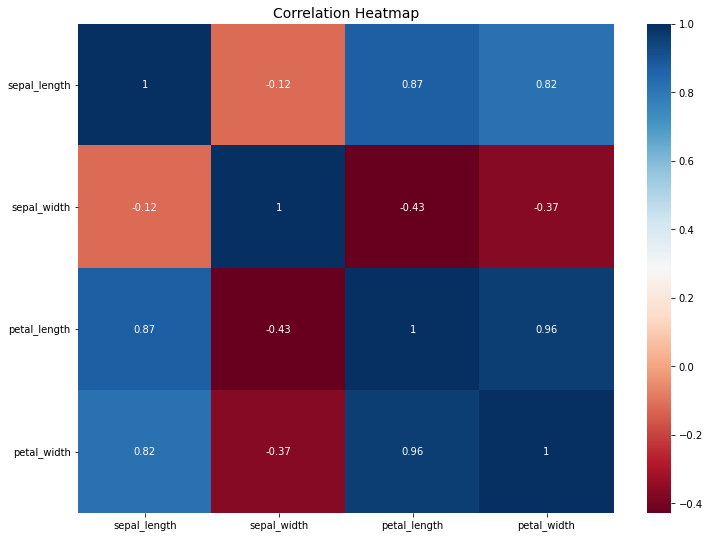

In [19]:
plt.figure(figsize=(12,9))
sns.heatmap(iris.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

In [21]:
scaler = StandardScaler()
df_std = scaler.fit_transform(iris)

In [22]:
df_std = pd.DataFrame(data = df_std, columns = iris.columns)

In [23]:
print(df_std)

     sepal_length  sepal_width  petal_length  petal_width
0       -0.900681     1.019004     -1.340227    -1.315444
1       -1.143017    -0.131979     -1.340227    -1.315444
2       -1.385353     0.328414     -1.397064    -1.315444
3       -1.506521     0.098217     -1.283389    -1.315444
4       -1.021849     1.249201     -1.340227    -1.315444
..            ...          ...           ...          ...
145      1.038005    -0.131979      0.819596     1.448832
146      0.553333    -1.282963      0.705921     0.922303
147      0.795669    -0.131979      0.819596     1.053935
148      0.432165     0.788808      0.933271     1.448832
149      0.068662    -0.131979      0.762758     0.790671

[150 rows x 4 columns]


In [24]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

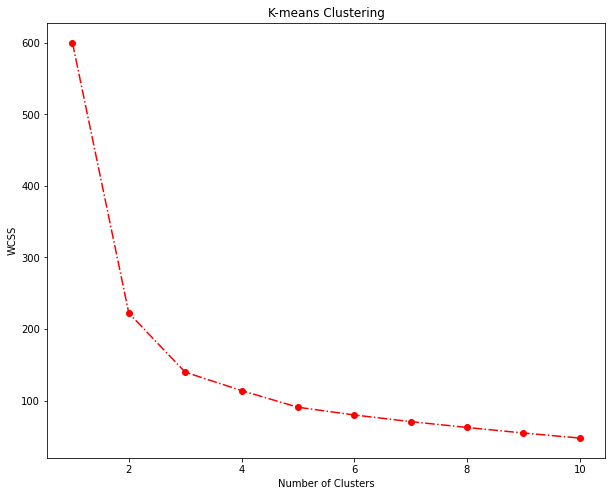

In [25]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [57]:
from sklearn.cluster import KMeans
import numpy as np
km = KMeans()
X = np.random.rand(100, 2)
km.fit(X)
print(km.labels_)

[7 2 5 1 2 4 7 3 4 4 1 2 5 2 0 2 4 4 3 4 1 2 2 0 1 4 7 7 0 2 7 3 0 6 3 2 1
 3 2 3 7 1 4 6 2 2 3 5 7 0 7 5 1 4 1 5 7 5 4 5 4 3 5 7 5 5 0 3 5 0 1 2 2 5
 7 1 2 5 3 1 0 3 1 0 6 2 1 0 7 6 4 6 3 3 0 1 0 7 1 0]


In [58]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [66]:
df_segm_kmeans= df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std, columns = iris.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

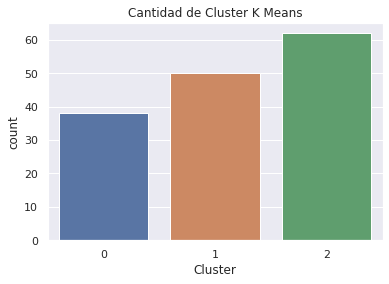

In [65]:
kmeans=KMeans(n_clusters=3).fit(iris)
centroids = kmeans.cluster_centers_
labels_i=kmeans.labels_
sns.countplot(kmeans.labels_)
plt.title("Cantidad de Cluster K Means")
plt.xlabel("Cluster")
plt.show()

In [67]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,sepal_length,sepal_width,petal_length,petal_width
Segment K-means,,,,
0,1.219757,0.037639,1.127714,1.147463
1,-1.014579,0.853263,-1.304987,-1.254893
2,0.070616,-0.711184,0.361229,0.308727
